In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("shot_logs.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [6]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [7]:
df.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [8]:
# FGM == SHOT_RESULT
sum((df.SHOT_RESULT == "made") != (df.FGM))

0

In [9]:
df.loc[df.player_id == 203148].player_name.iloc[0]

'brian roberts'

In [10]:
# Number of players
print(len(df.player_id.unique()))
# Mapping of player_id -> name
player_name = {pid : df.loc[df.player_id == pid].player_name.iloc[0] for pid in df.player_id.unique()}

281


In [11]:
# Closest defenders
print(len(df.CLOSEST_DEFENDER_PLAYER_ID.unique()))
defender_name = {pid : df.loc[df.CLOSEST_DEFENDER_PLAYER_ID == pid].CLOSEST_DEFENDER.iloc[0] for pid in df.CLOSEST_DEFENDER_PLAYER_ID.unique()}

474


In [12]:
# Not all defenders are players
for pid in defender_name:
    if pid in player_name:
        continue
        print(pid, player_name[pid], defender_name[pid])
    else:
        print(pid, defender_name[pid], "not player")

203900 Brown, Markel not player
202721 Morris, Darius not player
2584 Green, Willie not player
203923 Young, James not player
203109 Crowder, Jae not player
101249 Lucas III, John not player
203915 Dinwiddie, Spencer not player
201588 Hill, George not player
203963 Whittington, Shayne not player
204025 Frazier, Tim not player
201988 Mills, Patty not player
204038 Galloway, Langston not player
200811 Amundson, Lou not player
203584 Daniels, Troy not player
101133 Mahinmi, Ian not player
203515 Pressey, Phil not player
2557 Ridnour, Luke not player
201147 Brewer, Corey not player
2746 Smith, Josh not player
203477 Canaan, Isaiah not player
203088 Marshall, Kendall not player
202397 Smith, Ish not player
203914 Harris, Gary not player
203100 Wroten, Tony not player
2760 Varejao, Anderson not player
203561 Davies, Brandon not player
201575 Rush, Brandon not player
200777 Freeland, Joel not player
203136 Kuzmic, Ognjen not player
202333 Henry, Xavier not player
203085 Rivers, Austin not pla

In [11]:
# Disgard qualitative features
from datetime import datetime
df = pd.read_csv("shot_logs.csv")
# Parse game clock
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)
df

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,GAME_CLOCK_SECS
0,0,1,24,1,1,10.8,2,1.9,7.7,2,1.3,1,69.0
1,0,1,24,2,1,3.4,0,0.8,28.2,3,6.1,0,14.0
2,0,1,24,3,1,0.0,3,2.7,10.1,2,0.9,0,0.0
3,0,1,24,4,2,10.3,2,1.9,17.2,2,3.4,0,707.0
4,0,1,24,5,2,10.9,2,2.7,3.7,2,1.1,0,634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,0,0,-16,5,3,18.3,5,6.2,8.7,2,0.8,0,112.0
128065,0,0,-16,6,4,19.8,4,5.2,0.6,2,0.6,1,688.0
128066,0,0,-16,7,4,23.0,2,4.2,16.9,2,4.2,1,670.0
128067,0,0,-16,8,4,9.1,4,4.5,18.3,2,3.0,0,157.0


/Users/minghao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 0.00126147  0.0109673   0.10968313  0.04067381 -0.03108496  0.00681808
   0.10298934 -0.18903445 -0.59222301  0.0364108   0.28461914  0.01334077]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67     20953
           1       0.58      0.48      0.53     17468

    accuracy                           0.61     38421
   macro avg       0.60      0.60      0.60     38421
weighted avg       0.61      0.61      0.60     38421

[[14953  6000]
 [ 9055  8413]]


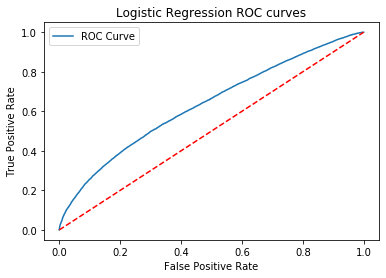

/Users/minghao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.72      0.67     20990
           1       0.58      0.46      0.51     17431

    accuracy                           0.60     38421
   macro avg       0.60      0.59      0.59     38421
weighted avg       0.60      0.60      0.60     38421

[[15184  5806]
 [ 9381  8050]]


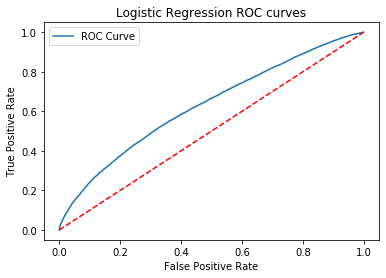

In [30]:
#First, let's try the simple logistic regression

from sklearn import model_selection, linear_model, metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(StandardScaler().fit_transform(df.drop(['FGM'],axis=1)), 
                                                   df['FGM'], test_size=0.30)
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print(logistic.coef_)
y_pred = logistic.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
y_prob = logistic.predict_proba(X_test)[:,1]
fp, tp, thresh = metrics.roc_curve(y_test, y_prob)
plt.plot(fp, tp, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curves')
plt.show()

df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(StandardScaler().
                                                                    fit_transform(df.drop(['FGM'],axis=1)), 
                                                                    df['FGM'], test_size=0.30)
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
# print(logistic.coef_)
y_pred = logistic.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
y_prob = logistic.predict_proba(X_test)[:,1]
fp, tp, thresh = metrics.roc_curve(y_test, y_prob)
plt.plot(fp, tp, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curves')
plt.show()


              precision    recall  f1-score   support

           0       0.61      0.85      0.71     21036
           1       0.66      0.34      0.45     17385

    accuracy                           0.62     38421
   macro avg       0.64      0.60      0.58     38421
weighted avg       0.63      0.62      0.59     38421

[[17941  3095]
 [11410  5975]]


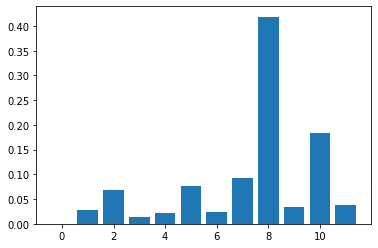

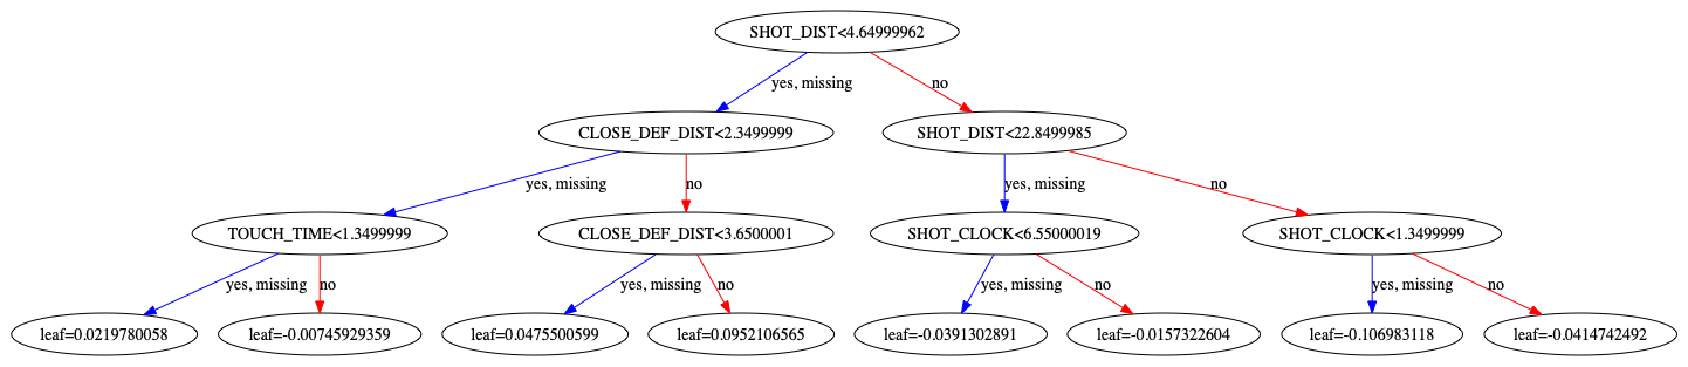

In [20]:
#Let's try sota boosting package

import xgboost
import matplotlib.pyplot as plt
import graphviz

df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = xgboost.XGBClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
xgboost.plot_tree(clf, num_trees=4, ax=ax)
plt.show()

              precision    recall  f1-score   support

           0       0.61      0.86      0.71     21033
           1       0.66      0.34      0.45     17388

    accuracy                           0.62     38421
   macro avg       0.64      0.60      0.58     38421
weighted avg       0.64      0.62      0.59     38421

[[18047  2986]
 [11473  5915]]


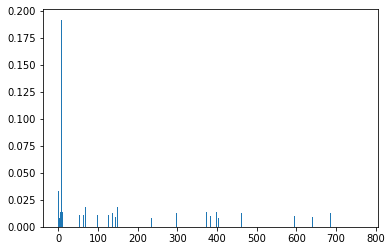

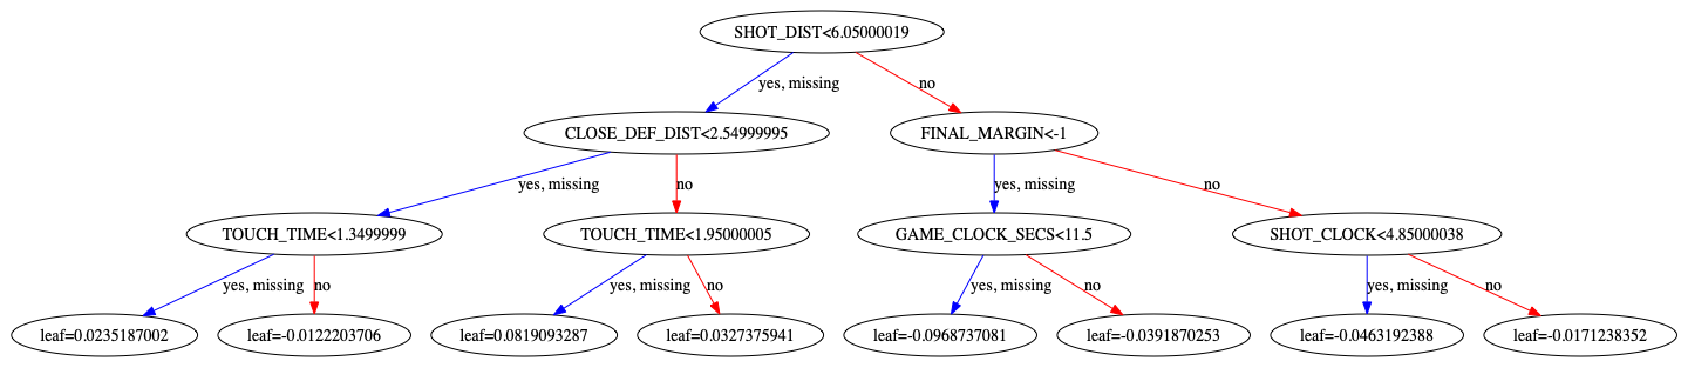

In [25]:
from datetime import datetime
import xgboost
import matplotlib.pyplot as plt
import graphviz

df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = xgboost.XGBClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
xgboost.plot_tree(clf, num_trees=4, ax=ax)
plt.show()

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     20982
           1       0.50      0.50      0.50     17439

    accuracy                           0.54     38421
   macro avg       0.54      0.54      0.54     38421
weighted avg       0.54      0.54      0.54     38421

[[12180  8802]
 [ 8778  8661]]


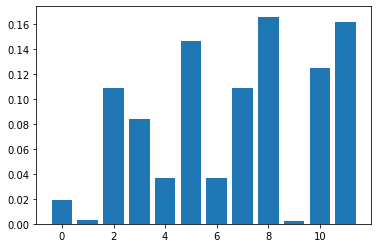

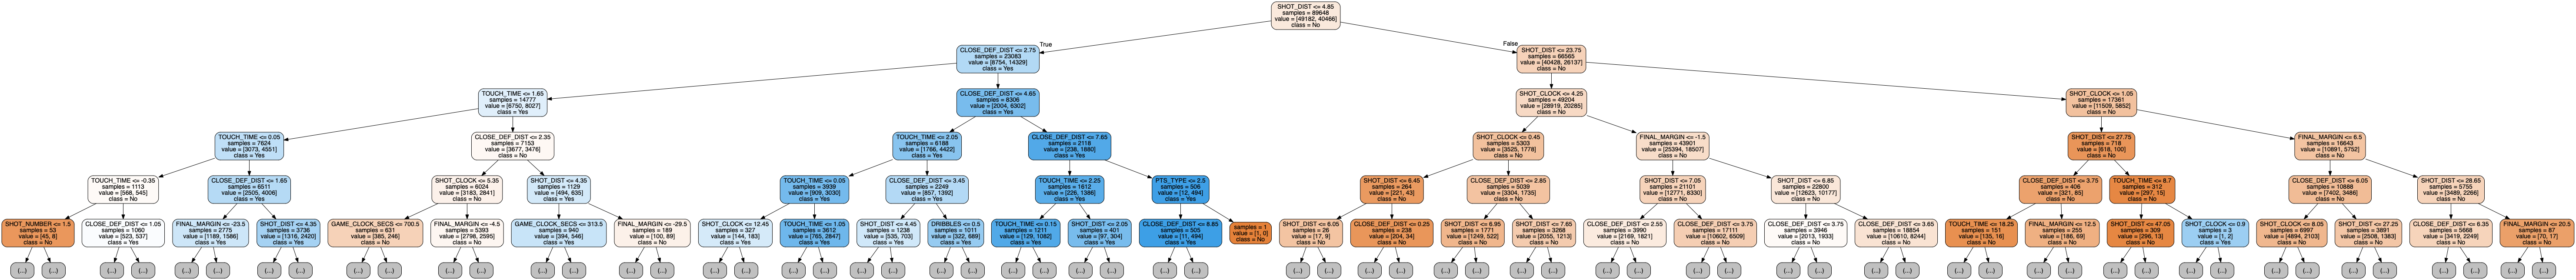

In [9]:
#Let's try vanilla decision tree
from sklearn import tree
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
decision = tree.DecisionTreeClassifier().fit(X_train,y_train)
y_pred = decision.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(decision.feature_importances_)), decision.feature_importances_)
plt.show()

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("decision_tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision,
                              out_file=f,
                              max_depth = 5,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
check_call(['dot','-Tpng','decision_tree1.dot','-o','decision_tree1.png'])
img = Image.open("decision_tree1.png")
draw = ImageDraw.Draw(img)
img.save('decision_tree1.png')
PImage("decision_tree1.png")

              precision    recall  f1-score   support

           0       0.59      0.60      0.60     21033
           1       0.50      0.49      0.50     17388

    accuracy                           0.55     38421
   macro avg       0.55      0.55      0.55     38421
weighted avg       0.55      0.55      0.55     38421

[[12708  8325]
 [ 8909  8479]]


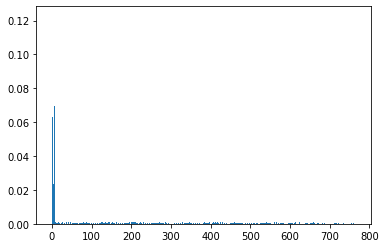

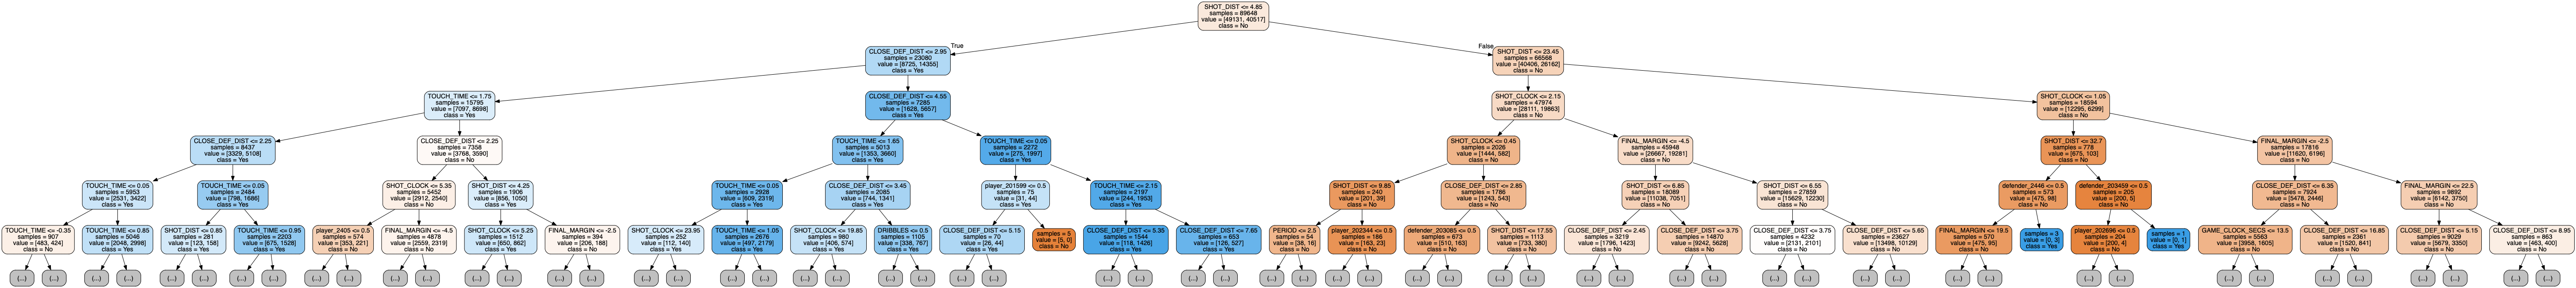

In [10]:
#Let's try vanilla decision tree
from sklearn import tree
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
decision = tree.DecisionTreeClassifier().fit(X_train,y_train)
y_pred = decision.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(decision.feature_importances_)), decision.feature_importances_)
plt.show()

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("decision_tree2.dot", 'w') as f:
     f = tree.export_graphviz(decision,
                              out_file=f,
                              max_depth = 5,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
check_call(['dot','-Tpng','decision_tree2.dot','-o','decision_tree2.png'])
img = Image.open("decision_tree2.png")
draw = ImageDraw.Draw(img)
img.save('decision_tree2.png')
PImage("decision_tree2.png")

              precision    recall  f1-score   support

           0       0.60      0.84      0.70     20911
           1       0.64      0.35      0.45     17510

    accuracy                           0.61     38421
   macro avg       0.62      0.59      0.58     38421
weighted avg       0.62      0.61      0.59     38421

[[17462  3449]
 [11411  6099]]


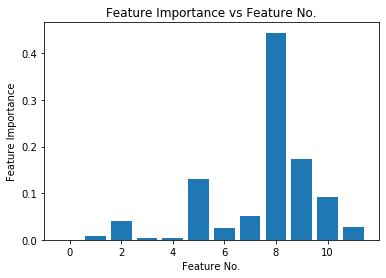

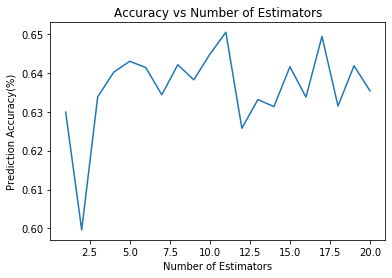

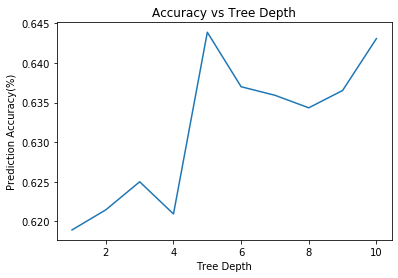

In [6]:
#Let's try Random Forest
from datetime import datetime
from sklearn import model_selection, linear_model, metrics
import numpy as np
from sklearn import ensemble, tree

df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.title('Feature Importance vs Feature No.')
plt.xlabel('Feature No.')
plt.ylabel('Feature Importance')
plt.show()

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

for i in range(len(clf.estimators_)):
    with open('forest_tree' + str(i) + '.dot', 'w') as f:
         f = tree.export_graphviz(clf.estimators_[i],
                                  out_file=f,
                                  max_depth = 5,
                                  impurity = False,
                                  feature_names = X_test.columns.values,
                                  class_names = ['No', 'Yes'],
                                  rounded = True,
                                  filled= True )

    check_call(['dot','-Tpng','forest_tree' + str(i) + '.dot','-o','forest_tree' + str(i) + '.png'])
    img = Image.open('forest_tree' + str(i) + '.png')
    draw = ImageDraw.Draw(img)
    img.save('forest_tree' + str(i) + '.png')

PImage('forest_tree' + str(0) + '.png')

prec = []
for i in range(1, 21):
    clf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prec.append(metrics.precision_score(y_test, y_pred))
plt.plot(np.linspace(1, 20, 20), prec)
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Accuracy(%)')
plt.show()

prec = []
for i in range(1, 11):
    clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prec.append(metrics.precision_score(y_test, y_pred))
plt.plot(np.linspace(1, 10, 10), prec)
plt.title('Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Prediction Accuracy(%)')
plt.show()
    

              precision    recall  f1-score   support

           0       0.57      0.96      0.71     21107
           1       0.70      0.12      0.20     17314

    accuracy                           0.58     38421
   macro avg       0.63      0.54      0.46     38421
weighted avg       0.63      0.58      0.48     38421

[[20209   898]
 [15246  2068]]


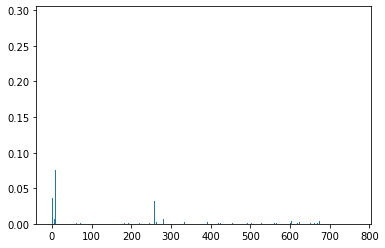

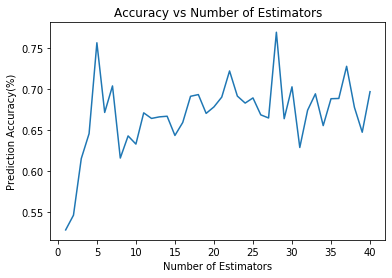

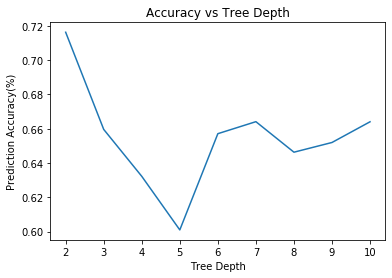

In [9]:
from sklearn import ensemble
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

for i in range(len(clf.estimators_)):
    with open('forest_tree_new' + str(i) + '.dot', 'w') as f:
         f = tree.export_graphviz(clf.estimators_[i],
                                  out_file=f,
                                  max_depth = 5,
                                  impurity = False,
                                  feature_names = X_test.columns.values,
                                  class_names = ['No', 'Yes'],
                                  rounded = True,
                                  filled= True )

    check_call(['dot','-Tpng','forest_tree_new' + str(i) + '.dot','-o','forest_tree_new' + str(i) + '.png'])
    img = Image.open('forest_tree_new' + str(i) + '.png')
    draw = ImageDraw.Draw(img)
    img.save('forest_tree_new' + str(i) + '.png')

PImage('forest_tree_new' + str(0) + '.png')

prec = []
for i in range(1, 41):
    clf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prec.append(metrics.precision_score(y_test, y_pred))
plt.plot(np.linspace(1, 40, 40), prec)
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Accuracy(%)')
plt.show()

prec = []
for i in range(2, 11):
    clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prec.append(metrics.precision_score(y_test, y_pred))
plt.plot(np.linspace(2, 10, 9), prec)
plt.title('Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Prediction Accuracy(%)')
plt.show()

In [7]:
#Let's try Linear SVM
from sklearn import svm
from datetime import datetime
from sklearn import model_selection, linear_model, metrics
import numpy as np
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
# df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
# df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           0       0.56      0.91      0.69     20975
           1       0.54      0.13      0.21     17446

    accuracy                           0.56     38421
   macro avg       0.55      0.52      0.45     38421
weighted avg       0.55      0.56      0.47     38421

[[19054  1921]
 [15146  2300]]


/Users/minghao/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
from sklearn import svm
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

/Users/minghao/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.56      0.96      0.71     21177
           1       0.58      0.07      0.12     17244

    accuracy                           0.56     38421
   macro avg       0.57      0.51      0.41     38421
weighted avg       0.57      0.56      0.44     38421

[[20316   861]
 [16066  1178]]


In [12]:
from datetime import datetime
from sklearn import model_selection, linear_model, metrics
import numpy as np
from sklearn import naive_bayes
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.55      0.59     21114
           1       0.52      0.60      0.56     17307

    accuracy                           0.57     38421
   macro avg       0.58      0.58      0.57     38421
weighted avg       0.58      0.57      0.58     38421

[[11684  9430]
 [ 6903 10404]]


In [15]:
from datetime import datetime
from sklearn import model_selection, linear_model, metrics
import numpy as np
from sklearn import naive_bayes
df = pd.read_csv("shot_logs.csv")
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df = pd.concat([df, pd.get_dummies(df['player_id'], prefix="player")], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLOSEST_DEFENDER_PLAYER_ID'], prefix="defender")], axis=1)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
clf = clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           0       0.57      0.54      0.55     21092
           1       0.48      0.52      0.50     17329

    accuracy                           0.53     38421
   macro avg       0.53      0.53      0.53     38421
weighted avg       0.53      0.53      0.53     38421

[[11304  9788]
 [ 8360  8969]]
